In [1]:
using DataFrames
using CSV
using Plots
using Images
using StatsPlots

In [67]:
key = "tail"

folder_path = joinpath(@__DIR__, "export", key)
data_480_640 = CSV.read(joinpath(folder_path, "export_data.csv"), DataFrame)

sdm_data = filter(x -> x.Method == "sdm_data_zoom" || x.Method == "rse_data_zoom", data_480_640)

sx = repeat(["SDM", "RSE"], inner = 3)
nam = repeat(["480×640", "360×480", "240×320"], outer = 2)

6-element Array{String,1}:
 "480×640"
 "360×480"
 "240×320"
 "480×640"
 "360×480"
 "240×320"

In [68]:
theme(:ggplot2)
pgfplotsx()

Plots.PGFPlotsXBackend()

In [33]:
cgradients()

6-element Array{Symbol,1}:
 :blues
 :viridis
 :pu_or
 :magma
 :plasma
 :inferno

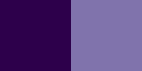

In [54]:
[cgrad(:pu_or)[1] cgrad(:pu_or)[3]]

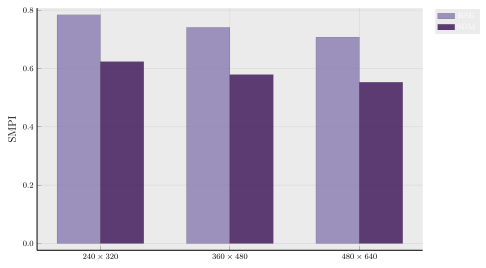

In [69]:
p_ENL = groupedbar(nam, sdm_data.ENL, group = sx, ylabel = "ENL",
    fillalpha = 0.75,color = repeat([cgrad(:pu_or)[1], cgrad(:pu_or)[3]], inner=3),
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SSI = groupedbar(nam, sdm_data.SSI, group = sx, ylabel = "SSI",
    fillalpha = 0.75, color = repeat([cgrad(:pu_or)[1], cgrad(:pu_or)[3]], inner=3),
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SMPI = groupedbar(nam, sdm_data.SMPI, group = sx, ylabel = "SMPI",
    fillalpha = 0.75, color = repeat([cgrad(:pu_or)[1], cgrad(:pu_or)[3]], inner=3),
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

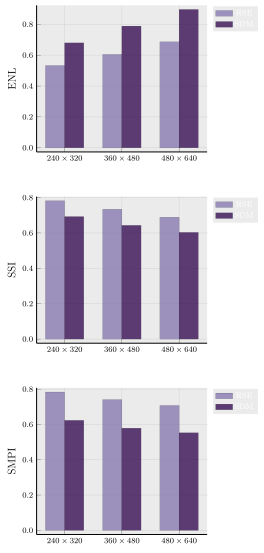

In [70]:
p = plot(p_ENL, p_SSI, p_SMPI, layout=(3, 1), size=(300, 800), tex_output_standalone = true)

In [71]:
saving_path = joinpath(@__DIR__, "Plot")
savefig(p, joinpath(saving_path, "Bar_$key.tex"))